### Rotující kruhová stěna

##### Základní vztahy

Radiální a tečné napětí (obojí jsou hlavní napětí),

\begin{eqnarray}
  \sigma_r(r)&=&A-\frac{B}{r^2}-\frac{3+\mu}{8}\rho r^2\omega^2, \\
  \sigma_t(r)&=&A+\frac{B}{r^2}-\frac{1+3\mu}{8}\rho r^2\omega^2,
\end{eqnarray}

kde $\mu$ je Poissonovo číslo, $\rho$ hustota a $\omega$ úhlová rychlost. Napětí $\sigma_z(x)$ zanedbáme za předpokladu $h<r$. Pro posuvy v radiálním směru platí,

\begin{equation}
  u(r)=\frac{1-\mu}{E}Ar+\frac{1+\mu}{E}\frac{B}{r}-\frac{1-\mu^2}{8E}\rho r^3\omega^2,
\end{equation}

kde $E$ je *Youngův* modul pružnosti v tahu.

In [1]:
%matplotlib inline
import sympy as sp
from numpy import linspace
from math import pi
import matplotlib.pyplot as plt
from IPython.core.display import Image
sp.init_printing()

##### Př.1

Stanovte redukované napětí pro rotující stěnu.

$n=5000\,\mathrm{ot}\times\mathrm{min}^{-1}$,

$p=10\times 10^6\,\mathrm{Pa}$,

$r_1=50\,\mathrm{mm}$,

$r_2=200\,\mathrm{mm}$,

$\mu=0.3$,

$\rho=7800\,\mathrm{kg}\times\mathrm{m}^3.$

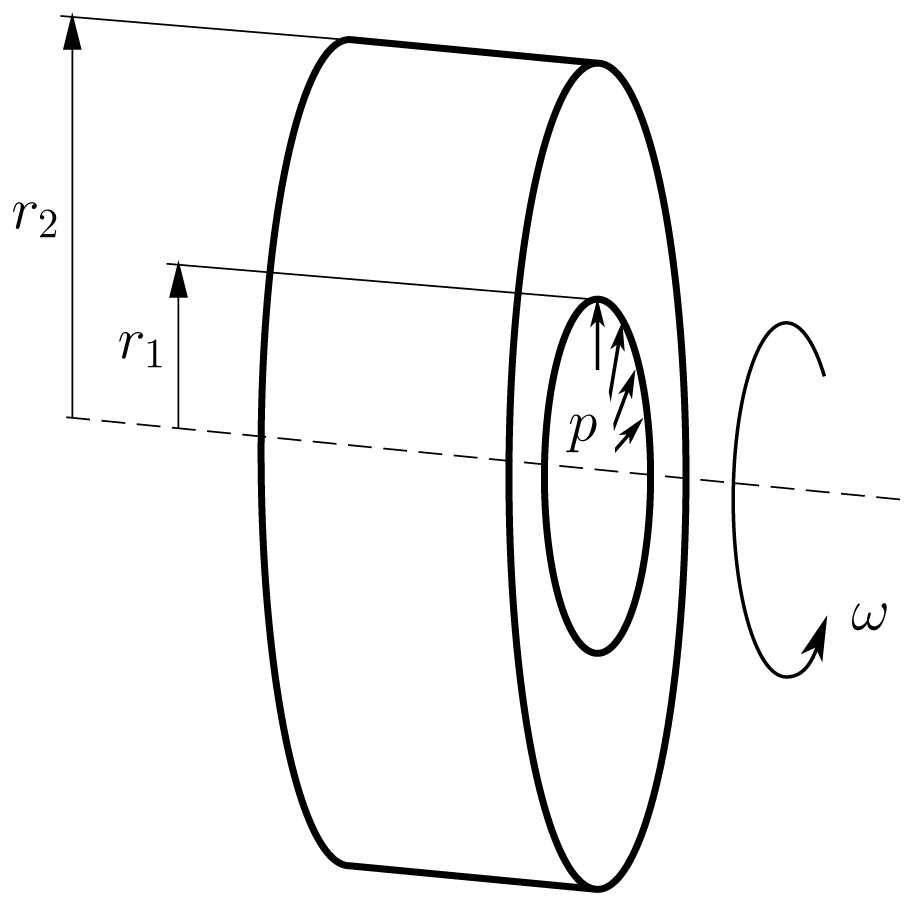

In [2]:
Image(filename='rotujici_stena1.png',width=300)

Zavedení potřebných symbolů,

In [3]:
A,B=sp.symbols('A B')
p=sp.symbols('p')
r,r1,r2=sp.symbols('r r1 r2')
mu,rho,omega=sp.symbols('mu rho omega')

Vztahy pro radiální a tečná napětí,

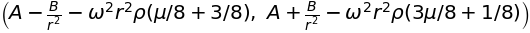

In [4]:
sigma_r=A-B/r**2-(3+mu)/8*rho*r**2*omega**2
sigma_t=A+B/r**2-(1+3*mu)/8*rho*r**2*omega**2
sigma_r,sigma_t

Okrajové podmínky,

\begin{eqnarray}
  \sigma_r=-p\quad&\mathrm{pro}&\,r=r_1, \\
  \sigma_r=0\quad&\mathrm{pro}&\,r=r_1
\end{eqnarray}

a z nich vyplývající soustava algebraických rovnic pro neznámé $A$ a $B$.

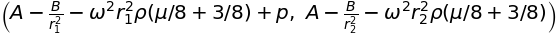

In [5]:
bc1=sigma_r.subs({r:r1})+p
bc2=sigma_r.subs({r:r2})
bc1,bc2

Řešení předchozí soustavy rovnic,

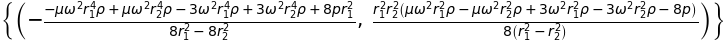

In [6]:
sol=sp.linsolve([bc1,bc2],[A,B])
sol

Dosazení zadaných hodnot a vykreslení průběhu napětí $\sigma_r(r)$ a $\sigma_t(r)$ v závislosti na souřadnici $r$,

In [7]:
n_,p_=5000,10e6
r1_,r2_=50e-3,200e-3
mu_,rho_=0.3,7800
omega_=2*n_*pi/60
n_,p_

In [8]:
A1=sol.args[0][0].subs({p:p_,r1:r1_,r2:r2_,omega:omega_,rho:rho_,mu:mu_})
B1=sol.args[0][1].subs({p:p_,r1:r1_,r2:r2_,omega:omega_,rho:rho_,mu:mu_})
A1,B1

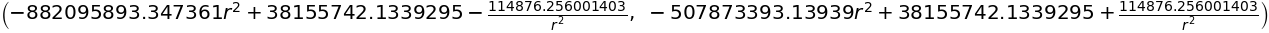

In [9]:
sigma_rf=sigma_r.subs({A:A1,B:B1,mu:mu_,omega:omega_,rho:rho_})
sigma_tf=sigma_t.subs({A:A1,B:B1,mu:mu_,omega:omega_,rho:rho_})
sigma_rf,sigma_tf

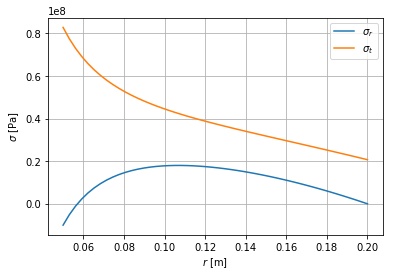

In [10]:
rls=linspace(r1_,r2_)
srplot=[sigma_rf.evalf(subs={r:ii}) for ii in rls]
stplot=[sigma_tf.evalf(subs={r:ii}) for ii in rls]

fig,ax=plt.subplots()
ax.set_ylabel(r'$\sigma$ [Pa]')
ax.set_xlabel(r'$r$ [m]')
ax.plot(rls,srplot,label=r'$\sigma_r$')
ax.plot(rls,stplot,label=r'$\sigma_t$')
ax.legend(loc='best')
ax.grid(True)

Složky tenzoru napětí $\sigma_r$ i $\sigma_t$ jsou hlavní a tudíž s Trescovy teorie můžeme vyhádřit redukované napětí jako,

\begin{equation}
  \sigma_{red}=|\sigma_r-\sigma_t|.
\end{equation}

Z grafu plyne, že jeho nejvetší hodnota je v místě $r=r_1$.

In [11]:
sigma_red=sigma_tf.subs(r,r1_)-sigma_rf.subs(r,r2_)
sigma_red